# Analysis of Teams and winning! #


In [134]:
# imports and setup
import scipy as sc
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)


In [138]:
df_all = pd.read_csv('Data/Team-stats/Cleaned-dataframe')
# drop the unnamed column
df_all = df_all.drop(df_all.columns[0], 1)
df_all = df_all.drop(df_all.columns[0], 1)
df_all.head(15)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,BLKA,PF,PFD,+/-,SEASON,Playoffs,Conf Semi,Conf Final,Finals,Champs
0,Utah Jazz,51,38,13,0.745,48.2,116.8,41.3,88.5,46.7,...,3.9,18.9,19.2,9.4,2020-21,0,0,0,0,0
1,Phoenix Suns,50,36,14,0.720,48.6,114.6,43.0,87.9,48.9,...,3.7,19.6,18.2,6.9,2020-21,0,0,0,0,0
2,Brooklyn Nets,52,36,16,0.692,48.5,119.0,43.4,87.9,49.4,...,4.6,19.1,18.8,4.8,2020-21,0,0,0,0,0
3,Philadelphia 76ers,51,35,16,0.686,48.5,114.0,41.5,86.9,47.7,...,4.6,20.5,21.3,5.0,2020-21,0,0,0,0,0
4,Los Angeles Clippers,52,34,18,0.654,48.0,114.6,41.9,87.0,48.2,...,3.8,19.3,17.9,6.6,2020-21,0,0,0,0,0
5,Denver Nuggets,51,33,18,0.647,48.6,115.5,43.7,89.4,48.9,...,4.4,18.8,19.2,5.6,2020-21,0,0,0,0,0
6,Milwaukee Bucks,50,32,18,0.640,48.1,119.3,44.5,91.1,48.8,...,4.8,17.1,18.3,6.2,2020-21,0,0,0,0,0
7,Los Angeles Lakers,51,32,19,0.627,48.5,110.0,40.9,85.8,47.6,...,4.4,19.0,21.5,4.3,2020-21,0,0,0,0,0
8,Portland Trail Blazers,50,30,20,0.600,48.1,115.2,40.5,90.9,44.6,...,4.5,19.3,18.9,0.1,2020-21,0,0,0,0,0
9,Dallas Mavericks,50,28,22,0.560,48.1,111.4,40.6,86.7,46.9,...,3.7,19.5,20.2,1.9,2020-21,0,0,0,0,0


In [139]:
# Find the descriptive stats about the dataset
df_all.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,BLKA,PF,PFD,+/-,Playoffs,Conf Semi,Conf Final,Finals,Champs
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,79.185304,39.592652,39.592652,0.499756,48.355272,100.810543,37.576677,82.833706,45.357668,7.538658,...,4.902875,4.904633,20.923642,15.829712,-0.006230,0.511182,0.255591,0.129393,0.063898,0.031949
std,7.620447,12.582981,12.492246,0.149930,0.182022,6.785624,2.338259,3.837249,1.595748,2.772714,...,0.800515,0.703928,1.687095,8.804678,4.518904,0.500275,0.436542,0.335903,0.244766,0.176005
min,49.000000,7.000000,9.000000,0.106000,48.000000,84.200000,32.400000,74.300000,40.800000,2.600000,...,2.400000,3.000000,16.600000,0.000000,-13.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,30.000000,30.000000,0.390000,48.200000,95.825000,35.925000,80.000000,44.300000,5.500000,...,4.300000,4.400000,19.700000,17.950000,-3.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82.000000,41.000000,39.000000,0.512000,48.400000,99.500000,37.300000,82.400000,45.300000,6.900000,...,4.900000,4.900000,20.900000,20.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,82.000000,49.000000,49.000000,0.610000,48.500000,104.975000,39.000000,85.600000,46.400000,9.300000,...,5.400000,5.400000,22.100000,21.200000,3.375000,1.000000,1.000000,0.000000,0.000000,0.000000
max,82.000000,73.000000,72.000000,0.890000,49.000000,119.300000,44.500000,94.000000,50.400000,16.900000,...,8.200000,6.900000,26.700000,25.700000,11.600000,1.000000,1.000000,1.000000,1.000000,1.000000


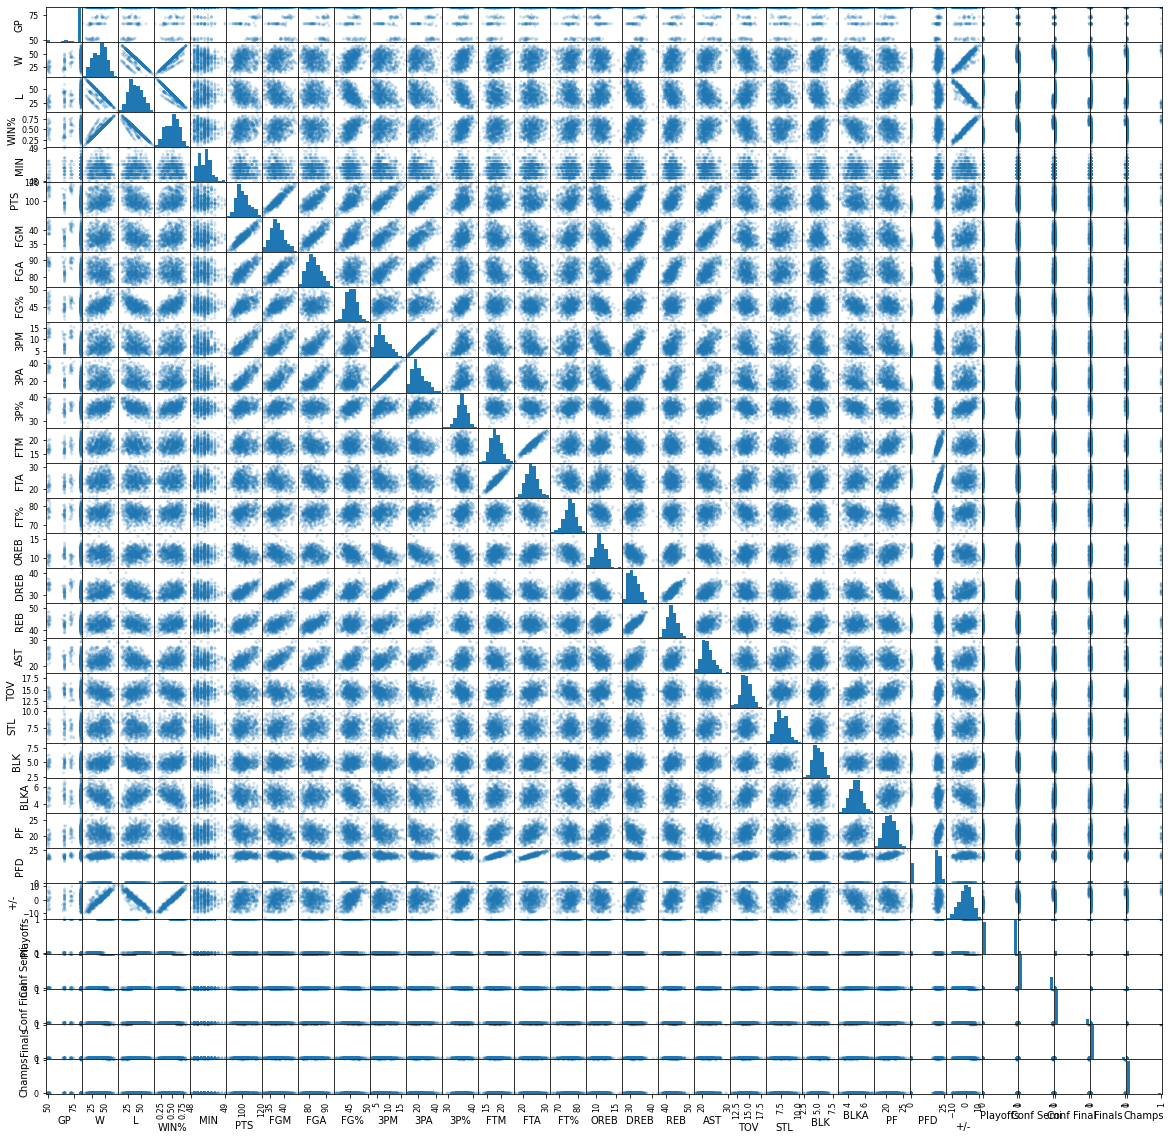

In [142]:
# plot the correlation matrix to visualize relationships
scatter_matrix(df_all, alpha=0.2, figsize = (20, 20))
print()

In [143]:
# Compute the correlation of all the variables
corr = df_all.corr()
corr.head()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,BLKA,PF,PFD,+/-,Playoffs,Conf Semi,Conf Final,Finals,Champs
GP,1.000000,0.314672,0.293057,0.016765,0.034938,-0.356711,-0.337616,-0.354296,-0.121127,-0.444946,...,-0.017188,-0.038011,0.262836,-0.163322,0.018312,0.206784,0.117044,0.077502,0.051972,0.034946
W,0.314672,1.000000,-0.815309,0.950480,-0.017748,0.190426,0.160262,-0.166237,0.504776,0.052526,...,0.249897,-0.432089,-0.133877,-0.035754,0.918787,0.800732,0.644654,0.508390,0.352893,0.276807
L,0.293057,-0.815309,1.000000,-0.947157,0.039189,-0.409407,-0.367377,-0.048682,-0.582331,-0.324331,...,-0.262197,0.412040,0.295183,-0.063615,-0.914289,-0.680407,-0.577938,-0.464806,-0.323752,-0.257501
WIN%,0.016765,0.950480,-0.947157,1.000000,-0.023823,0.315221,0.278929,-0.063698,0.575962,0.195408,...,0.267236,-0.448280,-0.223473,0.013106,0.967987,0.769945,0.634421,0.504311,0.350877,0.276963
MIN,0.034938,-0.017748,0.039189,-0.023823,1.000000,-0.102499,-0.087001,-0.071279,-0.060182,-0.117259,...,-0.003947,-0.007995,0.079779,-0.008803,-0.045857,0.019558,-0.091486,-0.085755,-0.039894,-0.075185


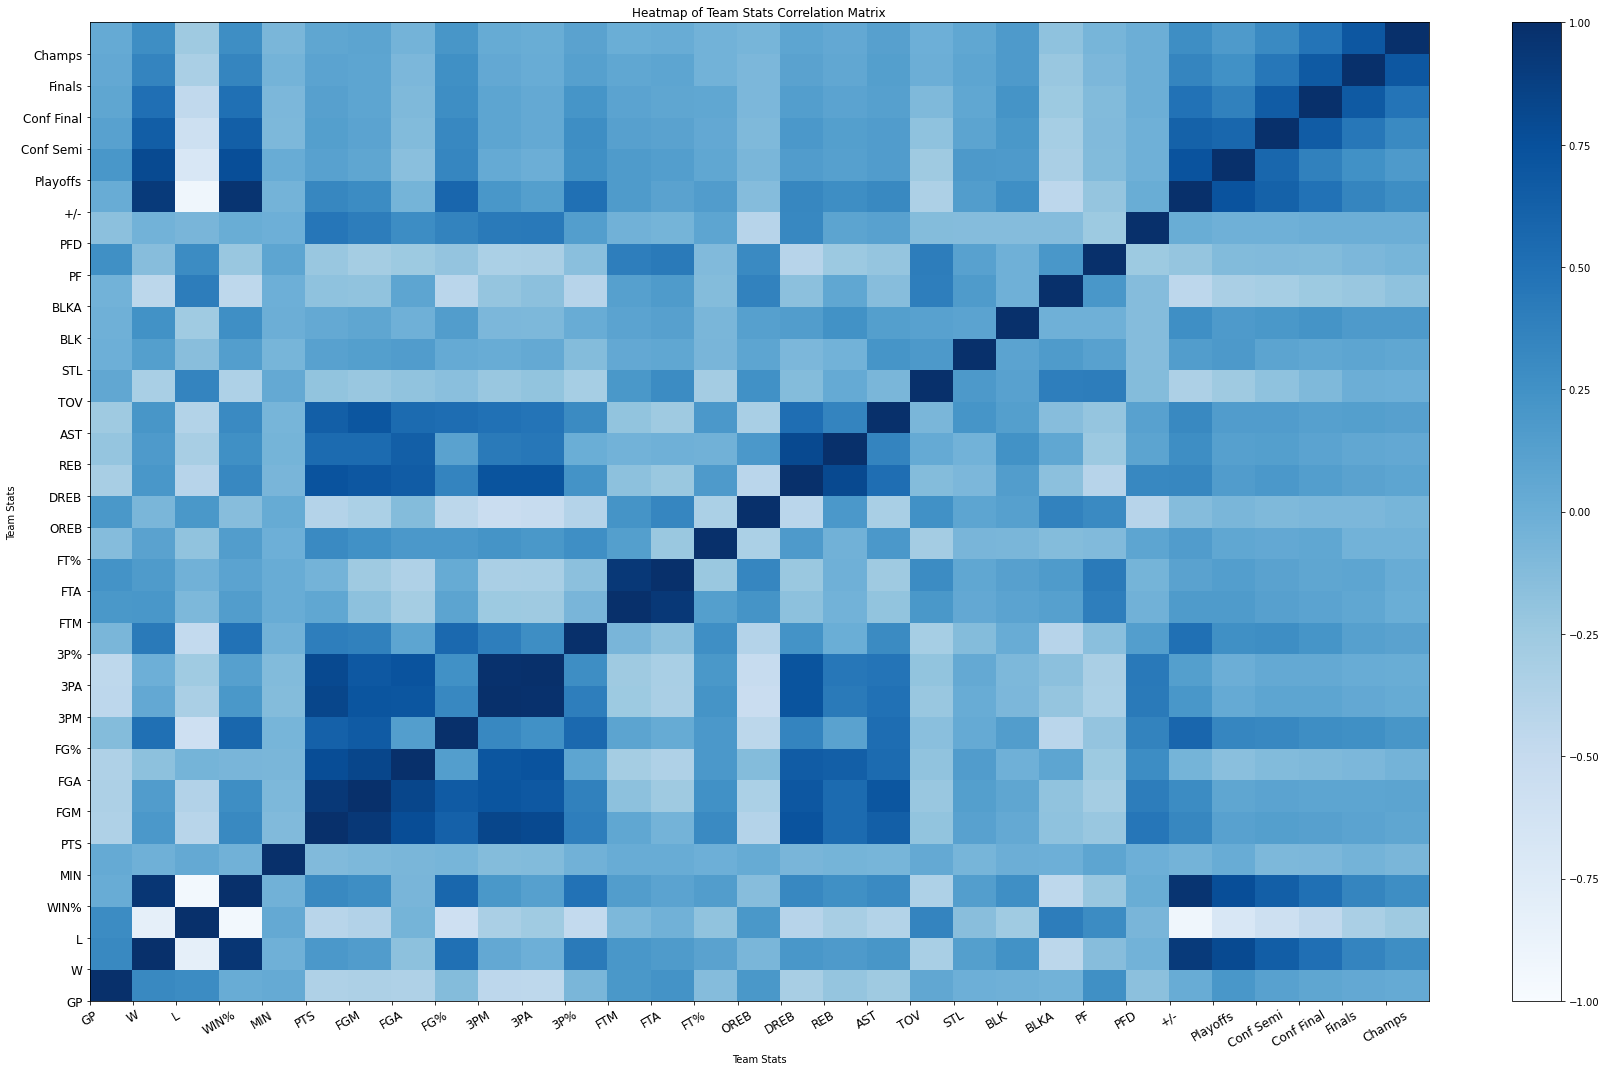

In [144]:
# Heat Map
names = corr.columns.to_list()
fig_hm = plt.figure(figsize=(30, 18))
heatmap = plt.pcolor(corr, vmin=-1, vmax=1, cmap=plt.cm.Blues)
plt.xticks(range(corr.shape[0]), labels=names, rotation=30, fontsize='large')
plt.yticks(range(corr.shape[0]), labels=names, fontsize='large')
plt.title("Heatmap of Team Stats Correlation Matrix")
plt.xlabel("Team Stats")
plt.ylabel("Team Stats")
plt.colorbar(heatmap)
plt.show()

**COMMENTS:** Unfortunately, this analysis isn't very telling for championships. None of our data have a strong correlation with winning championships. At the very best, we can say that Blocks allowed has a fairly strong negative correlation with winning championships.

<br>

For winning alone, the single best indicator, is plus/minus, a stat that tracks the difference in points from when a player enters and exits the game. This stat may suggest how effective the team is at growing/maintaining leads. It most likely reflects team chemistry and how effective different players mesh together.

<br>

In terms of other interesting insights, 3-pointers attempted, 3-pointers made, defensive rebounds, rebounds, and assists all had strong correlations with points, but offensive rebounds had a negative correlation. This indicates that offensive boards don't necessarily lead to more points!



In [145]:
# Let's do a similar analysis on only championship winners
df_champs = df_all.loc[df_all["Champs"] == 1]
df_champs.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,BLKA,PF,PFD,+/-,SEASON,Playoffs,Conf Semi,Conf Final,Finals,Champs
43,Los Angeles Lakers,71,52,19,0.732,48.1,113.4,42.3,88.3,48.0,...,3.7,20.7,21.7,5.8,2019-20,1,1,1,1,1
87,Toronto Raptors,82,58,24,0.707,48.5,114.4,42.2,89.1,47.4,...,4.5,21.0,20.5,6.1,2018-19,1,1,1,1,1
99,Golden State Warriors,82,58,24,0.707,48.1,113.5,42.8,85.1,50.3,...,3.7,19.6,18.5,6.0,2017-18,1,1,1,1,1
129,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,49.5,...,3.8,19.3,19.4,11.6,2016-17,1,1,1,1,1
155,Cleveland Cavaliers,82,57,25,0.695,48.4,104.3,38.7,84.0,46.0,...,4.4,20.3,20.6,6.0,2015-16,1,1,1,1,1


In [146]:
df_champs.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,BLKA,PF,PFD,+/-,Playoffs,Conf Semi,Conf Final,Finals,Champs
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.00000,20.000000,20.00000,20.000000,20.000000,20.0,20.0,20.0,20.0,20.0
mean,80.650000,58.750000,21.900000,0.728150,48.280000,103.500000,38.690000,81.850000,47.250000,8.010000,...,5.66500,4.225000,20.39500,15.515000,6.795000,1.0,1.0,1.0,1.0,1.0
std,4.233637,5.561853,4.423621,0.053518,0.157614,6.960339,2.717758,4.269167,1.589604,2.514359,...,0.94939,0.556185,1.35975,9.243107,2.178477,0.0,0.0,0.0,0.0,0.0
min,66.000000,46.000000,15.000000,0.634000,48.100000,90.100000,33.500000,76.700000,43.500000,4.100000,...,3.90000,3.200000,18.20000,0.000000,3.400000,1.0,1.0,1.0,1.0,1.0
25%,82.000000,56.750000,18.500000,0.695000,48.200000,99.550000,36.975000,77.475000,46.175000,6.175000,...,5.10000,3.700000,19.40000,13.900000,5.700000,1.0,1.0,1.0,1.0,1.0
50%,82.000000,58.000000,23.500000,0.707000,48.200000,101.500000,38.350000,82.450000,47.400000,7.300000,...,5.40000,4.250000,20.30000,20.250000,6.050000,1.0,1.0,1.0,1.0,1.0
75%,82.000000,62.750000,25.000000,0.765250,48.400000,107.675000,40.850000,85.100000,47.850000,10.725000,...,6.52500,4.625000,20.92500,21.200000,7.825000,1.0,1.0,1.0,1.0,1.0
max,82.000000,67.000000,30.000000,0.817000,48.600000,115.900000,43.100000,89.100000,50.300000,12.400000,...,7.50000,5.100000,22.80000,23.600000,11.600000,1.0,1.0,1.0,1.0,1.0


/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


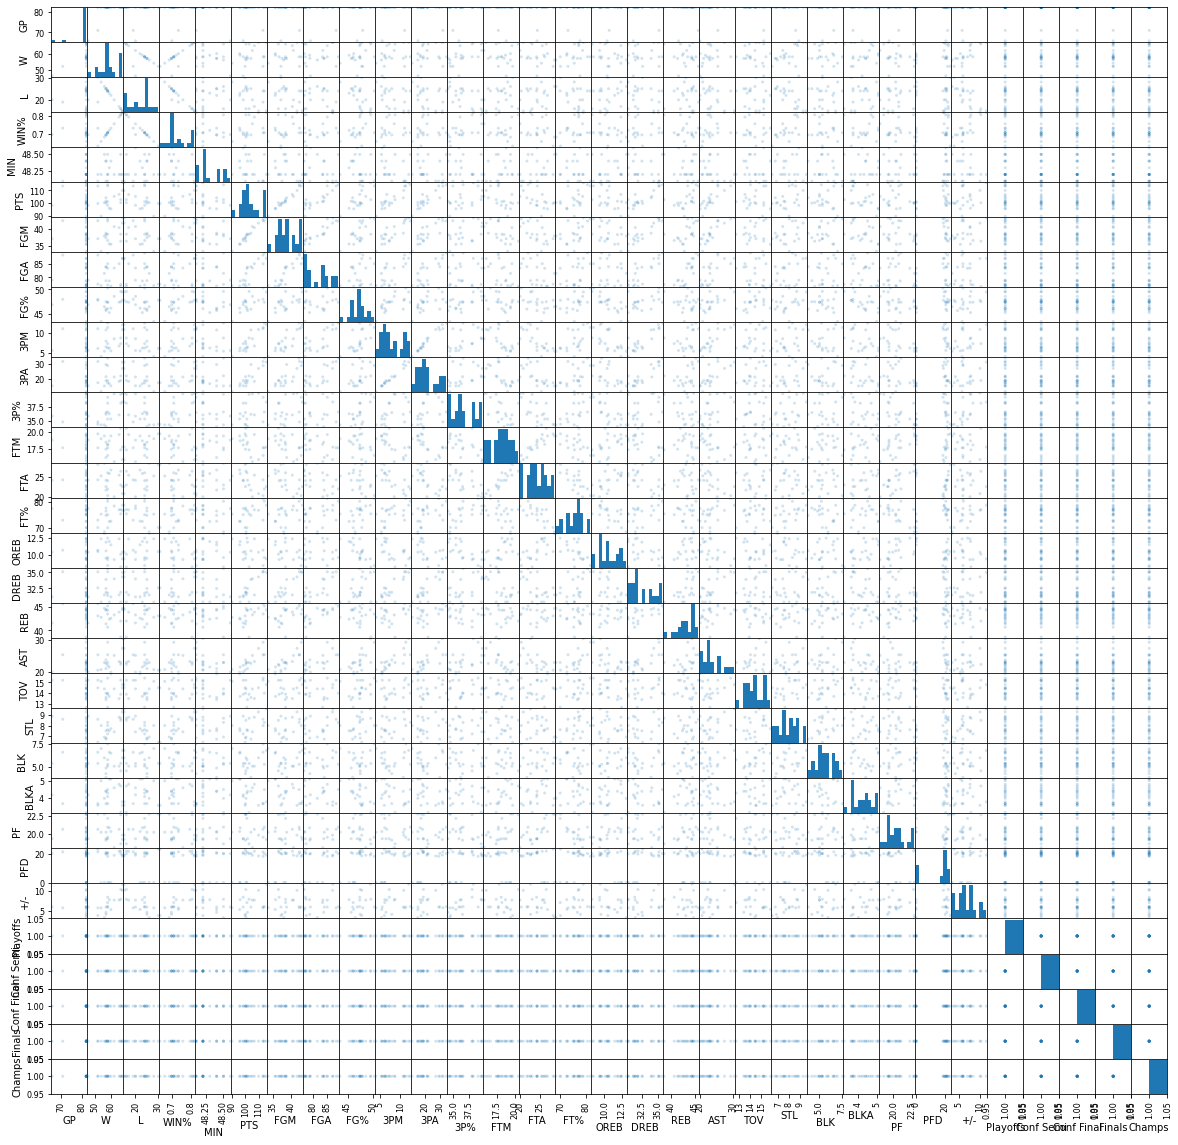

In [147]:
scatter_matrix(df_champs, alpha=0.2, figsize = (20, 20))
print()

In [148]:
# Compute the correlation of all the variables
corr_champs = df_champs.corr()
corr_champs.head()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,BLKA,PF,PFD,+/-,Playoffs,Conf Semi,Conf Final,Finals,Champs
GP,1.000000,0.621940,0.175083,0.105937,-0.247667,-0.051618,-0.065275,-0.073819,-0.020725,0.028034,...,-0.079156,0.138023,0.114878,-0.198781,0.135047,NaN,NaN,NaN,NaN,NaN
W,0.621940,1.000000,-0.662079,0.844446,-0.258167,0.320719,0.298225,0.163030,0.380101,0.335146,...,-0.039620,-0.016589,-0.153279,0.106346,0.726182,NaN,NaN,NaN,NaN,NaN
L,0.175083,-0.662079,1.000000,-0.960341,0.087565,-0.452643,-0.437432,-0.275627,-0.497738,-0.394551,...,-0.025941,0.152952,0.302663,-0.323953,-0.783786,NaN,NaN,NaN,NaN,NaN
WIN%,0.105937,0.844446,-0.960341,1.000000,-0.164975,0.444930,0.425122,0.260825,0.495526,0.408603,...,0.008396,-0.115419,-0.270124,0.269160,0.827806,NaN,NaN,NaN,NaN,NaN
MIN,-0.247667,-0.258167,0.087565,-0.164975,1.000000,-0.218769,-0.229027,-0.163476,-0.218472,-0.207978,...,-0.215961,0.150097,0.011788,-0.139957,-0.285416,NaN,NaN,NaN,NaN,NaN


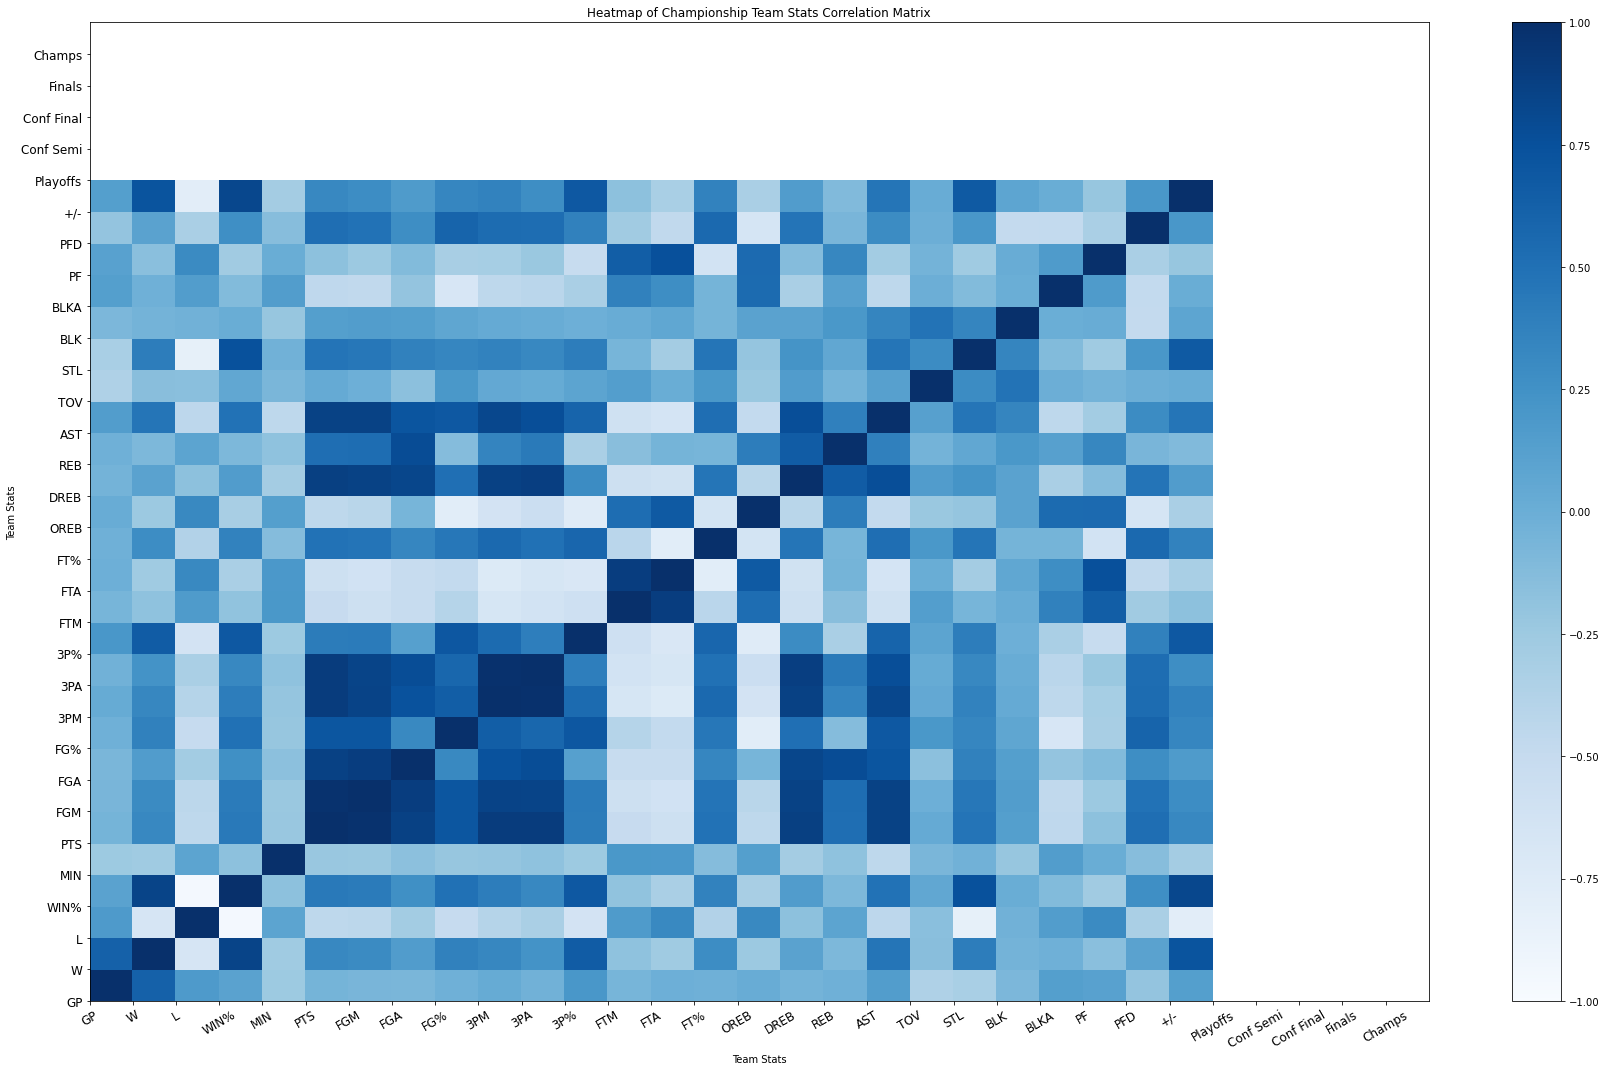

In [149]:
# Heat Map
names = corr.columns.to_list()
fig_hm = plt.figure(figsize=(30, 18))
heatmap = plt.pcolor(corr_champs, vmin=-1, vmax=1, cmap=plt.cm.Blues)
plt.xticks(range(corr.shape[0]), labels=names, rotation=30, fontsize='large')
plt.yticks(range(corr.shape[0]), labels=names, fontsize='large')
plt.title("Heatmap of Championship Team Stats Correlation Matrix")
plt.xlabel("Team Stats")
plt.ylabel("Team Stats")
plt.colorbar(heatmap)
plt.show()

In [211]:
# Develop a classification model for championship contenders
# First need to create a single column that defines the final category for each team, based off their playoff result
df_all['True'] = 0
df_all['True']
df_all.loc[(df_all['Champs'] == 1), 'True'] = 5
df_all.loc[(df_all['Finals'] == 1) & (df_all['Champs'] != 1), 'True'] = 4
df_all.loc[(df_all['Conf Final'] == 1) & (df_all['Finals'] != 1), 'True'] = 3
df_all.loc[(df_all['Conf Semi'] == 1) &(df_all['Conf Final'] != 1), 'True'] = 2
df_all.loc[(df_all['Playoffs'] == 1) & (df_all['Conf Semi'] != 1), 'True'] = 1

# Exclude the 2020-21 season (we want to use the model to predict those later)
df_00_20 = df_all.loc[df_all['SEASON'] != '2020-21']
df_20_21 = df_all.loc[df_all['SEASON'] == '2020-21']

# Move stat data to an array
X_all = df_00_20.loc[:, 'GP':'+/-'].values
y_true = df_00_20['True']

df_20_21.head(30)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,PF,PFD,+/-,SEASON,Playoffs,Conf Semi,Conf Final,Finals,Champs,True
0,Utah Jazz,51,38,13,0.745,48.2,116.8,41.3,88.5,46.7,...,18.9,19.2,9.4,2020-21,0,0,0,0,0,0
1,Phoenix Suns,50,36,14,0.720,48.6,114.6,43.0,87.9,48.9,...,19.6,18.2,6.9,2020-21,0,0,0,0,0,0
2,Brooklyn Nets,52,36,16,0.692,48.5,119.0,43.4,87.9,49.4,...,19.1,18.8,4.8,2020-21,0,0,0,0,0,0
3,Philadelphia 76ers,51,35,16,0.686,48.5,114.0,41.5,86.9,47.7,...,20.5,21.3,5.0,2020-21,0,0,0,0,0,0
4,Los Angeles Clippers,52,34,18,0.654,48.0,114.6,41.9,87.0,48.2,...,19.3,17.9,6.6,2020-21,0,0,0,0,0,0
5,Denver Nuggets,51,33,18,0.647,48.6,115.5,43.7,89.4,48.9,...,18.8,19.2,5.6,2020-21,0,0,0,0,0,0
6,Milwaukee Bucks,50,32,18,0.640,48.1,119.3,44.5,91.1,48.8,...,17.1,18.3,6.2,2020-21,0,0,0,0,0,0
7,Los Angeles Lakers,51,32,19,0.627,48.5,110.0,40.9,85.8,47.6,...,19.0,21.5,4.3,2020-21,0,0,0,0,0,0
8,Portland Trail Blazers,50,30,20,0.600,48.1,115.2,40.5,90.9,44.6,...,19.3,18.9,0.1,2020-21,0,0,0,0,0,0
9,Dallas Mavericks,50,28,22,0.560,48.1,111.4,40.6,86.7,46.9,...,19.5,20.2,1.9,2020-21,0,0,0,0,0,0


In [228]:
# A function that develops, optimizes, and tests an SVM model

def dev_test_svm(X, y, svm_name):
    # Cross-val function to find the best c-value.
    Cs = range(1, 150, 1)
    acc_list = np.zeros(len(Cs))

    for ii, val in enumerate(Cs):
        svm_optimize = svm.SVC(kernel='rbf', C=val)
        scores = cross_val_score(estimator=svm_optimize, X=X, y=y, cv=5, scoring='accuracy')
        acc_list[ii] = scores.mean()

    plt.plot(Cs, acc_list)
    plt.xlabel('C-value')
    plt.ylabel('Accuracy')
    plt.show()

    # Identify maximum C value
    np.max(acc_list)
    max_C_index = np.where(acc_list == np.max(acc_list))[0][0]
    max_C = Cs[max_C_index]
    print(max_C)
    
    # Create an SVM model using the ideal C value

    # Split data into test and training values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.42)

    # Train an SVM model
    if svm_name == 'all':
        svm_all = svm.SVC(kernel='rbf', C=max_C)
    elif svm_name == 'playoffs':
        svm_playoff = svm.SVC(kernel='rbf', C=max_C)
    else:
        svm_conf_semi = svm.SVC(kernel='rbf', C=max_C)
        
    
    # Train Model
    if svm_name == 'all':
        svm_all.fit(X_train, y_train)
    elif svm_name == 'playoffs':
        svm_playoff.fit(X_train, y_train)
    else:
        svm_conf_semi.fit(X_train, y_train)
        
    # Test Model
    if svm_name == 'all':
        print('svm_all')
        pred = svm_all.predict(X_test)
    elif svm_name == 'playoffs':
        print('playoffs')
        pred = svm_playoff.predict(X_test)
    else:
        print('conference semi')
        pred = svm_conf_semi.predict(X_test)
        
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_true = y_test, y_pred = pred))
    print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = pred))


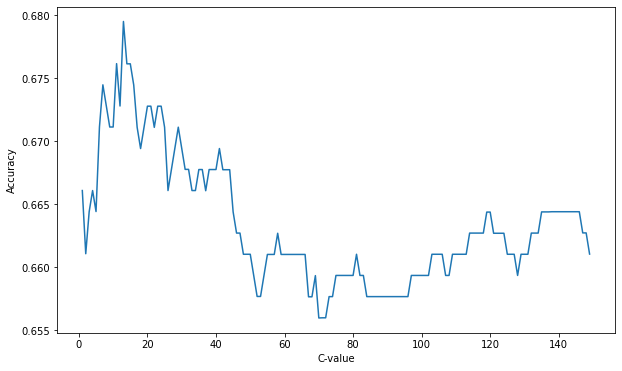

13
svm_all
Confusion Matrix:
 [[100  11   0   0   0   0]
 [  6  56   3   1   0   0]
 [  0  23  10   1   0   0]
 [  0   5  10   1   0   0]
 [  0   6   5   0   0   0]
 [  0   1  10   2   0   0]]
Accuracy =  0.6653386454183267


In [229]:
# Do SVM classification for all playoff results
dev_test_svm(X_all, y_true, 'all')

**COMMENTS** This SVM model displays an accuracy of 0.665 on test dataset. This is a decent value, it predicts the correct playoff outcome for a team about 70% of the time. The downside is, the error of the model increases as it tries to predict teams that will make it the farthest in the playoffs. For example, it only predicted the  correct championship team once.

<br>
If we take a deeper look at the confusion matrix, we can learn some nuances about the model. It is pretty good at predicting teams that won't make the playoffs. It is also really good at predicting teams that will qualify for the first round of the playoffs. After that, it's accuracy drops pretty significantly (29% accurate for predicting the conference semis, 6.25% accurate for conference finals, 0% for finals and 0% for champions)

<br>

The poor accuracy of predicting the deepest rounds of the playoffs can most likely be attributed to a lack of data. Consider that over the last 20 years, only 20 teams have won the championship, only 40 teams made it to the finals. With such a small sample size, it is understandable that

## Examine the accuracies of separate rounds of the playoffs ##

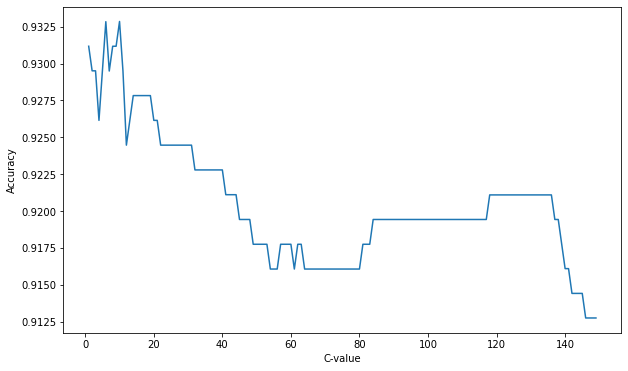

10
playoffs
Confusion Matrix:
 [[ 99  12]
 [  3 137]]
Accuracy =  0.9402390438247012


In [230]:
# SVM classification for first round of playoffs
dev_test_svm(X_all, df_00_20['Playoffs'], 'playoffs')

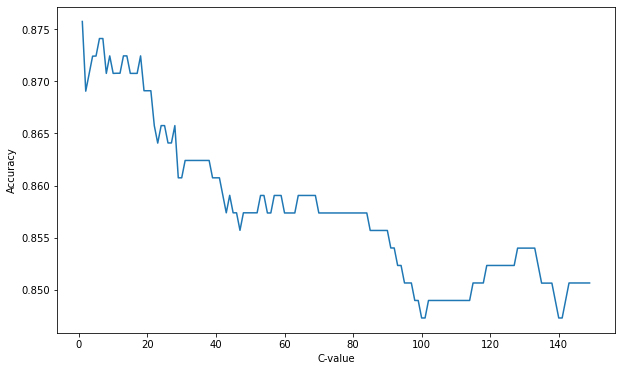

1
conference semi
Confusion Matrix:
 [[169   8]
 [ 27  47]]
Accuracy =  0.8605577689243028


In [231]:
# SVM classification for second round (conference semis) of playoffs
dev_test_svm(X_all, df_00_20['Conf Semi'], 'conf_semi')

# Predict results for the Utah Jazz using above SVMs #

In [225]:
X_utah = df_20_21.loc[df_20_21['TEAM'] == 'Utah Jazz'].loc[:, 'GP':'+/-'].values
svm_all.predict(X_utah)

array([2])

NameError: name 'svm_playoff' is not defined

In [227]:
svm_conf_semi.predict(X_utah)

NameError: name 'svm_conf_semi' is not defined